# Generation of capacity curves using DBELA
This notebook enables the user to generate capacity curves (in terms of spectral acceleration vs. spectral displacement) using the Displacement-based Earthquake Loss Assessment (DBELA) approach. The DBELA methodology permits the calculation of the displacement capacity of a collection of structures at a number of limit states (which could be structural or non-structural). These displacements are derived based on the capacity of an equivalent SDOF structure, following the principles of structural mechanics ([Crowley et al., 2004](http://link.springer.com/article/10.1007%2Fs10518-004-2290-8); [Bal et al., 2010](http://www.iusspress.it/pc/viewPrd.asp?idcategory=25&idproduct=132); [Silva et al., 2013](http://www.sciencedirect.com/science/article/pii/S0141029613002071)). The figure below illustrates various capacity curves generated using this approach.

<img src="../../../../figures/synthethic_capacity_curves.png" width="350" align="middle">

**Note**: To run the code in a cell:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

In [24]:
import DBELA
from rmtk.vulnerability.common import utils
%matplotlib inline

---
### Load geometric and material properties

In order to use this methodology it is necessary to define a building model, which specifies the probabilistic distribution of the geometrical and material properties. These models need to be defined according to the format described in the [RMTK manual](../../../../../rmtk-docs.pdf). Please specify below the paths for the input files containing the building model and damage model:

In [25]:
building_model_file = "../../../../../rmtk_data/DBELA/bare_frames.csv"
damage_model_file = "../../../../../rmtk_data/damage_model_dbela_low_code.csv"

### Number of samples

The parameter `no_assets` below controls the number of synthetic structural models or assets (each one with unique geometrical and material properties) that will be generated using a Monte Carlo sampling process:

In [26]:
no_assets = 100

### Generate the capacity curves

In [27]:
building_class_model = DBELA.read_building_class_model(building_model_file)
assets = DBELA.generate_assets(building_class_model, no_assets)
damage_model = utils.read_damage_model(damage_model_file)
capacity_curves = DBELA.generate_capacity_curves(assets, damage_model)

### Plot the capacity curves

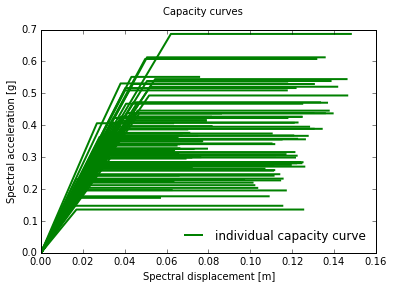

In [28]:
utils.plot_capacity_curves(capacity_curves)

### Include additional information
Additional information can be added to the capacity curves generated using the above method. For instance, by setting appropriate values for the parameters `gamma` and `yielding_point_index` in the cell below, the `add_information` function can be used to include this data in the previously generated capacity curves.

In [29]:
gamma = 1.2
yielding_point_index = 1.0

In [30]:
capacity_curves = utils.add_information(capacity_curves, "gamma", "value", gamma)
capacity_curves = utils.add_information(capacity_curves, "yielding point", "point", yielding_point_index)

### Save capacity curves
Please specify below the path for the output file to save the capacity curves:

In [31]:
output_file = "../../../../../rmtk_data/capacity_curves_dbela.csv"

In [32]:
utils.save_SdSa_capacity_curves(capacity_curves, output_file)